# **Task 1:** Image Classification


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
print(tf.__version__)

2.17.0


In [3]:
mnist=tf.keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

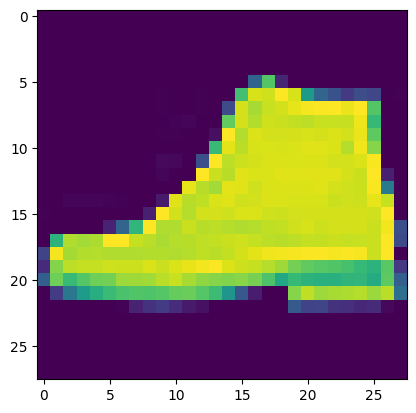

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[42])
print(train_labels[42])
print(train_images[42])

In [6]:
train_images=train_images/255.0
test_images=test_images/255.0

In [7]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [9]:
model.fit(train_images,train_labels,epochs=11)

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - Accuracy: 0.7862 - loss: 0.6275
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - Accuracy: 0.8616 - loss: 0.3851
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - Accuracy: 0.8752 - loss: 0.3363
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - Accuracy: 0.8835 - loss: 0.3164
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - Accuracy: 0.8924 - loss: 0.2939
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - Accuracy: 0.8955 - loss: 0.2782
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - Accuracy: 0.9009 - loss: 0.2686
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - Accuracy: 0.9033 - loss: 0.2595
Epoch 9/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.9100 - loss: 0.2415
Epoch 10/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - Accuracy: 0.9100 - loss: 0.2398
Epoch 11/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - Accuracy: 0.9165 - loss: 0.2245


In [10]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8741 - loss: 0.3724


[0.37261655926704407, 0.8733000159263611]

In [11]:
classifications=model.predict(test_images)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.6898404e-07 3.1161882e-11 9.2783098e-10 6.4161372e-12 1.0284621e-09
 9.4489253e-04 7.8523001e-08 3.0394133e-02 2.2460236e-10 9.6866077e-01]


In [12]:
print(test_labels[0])

9


# **Task 2:**CHATBOT

In [13]:
pip install transformers tensorflow


In [14]:
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel

# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2")

def generate_response(prompt, model, tokenizer, max_length=100):
    # Tokenize the input prompt
    inputs = tokenizer.encode(prompt, return_tensors='tf')

    # Generate a response using the model
    outputs = model.generate(inputs, max_length=max_length, do_sample=True, top_k=50, top_p=0.95)

    # Decode the generated tokens into text
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return response

def chat():
    print("Chatbot: Hello! Type 'exit' to end the conversation.")

    while True:
        # Get input from the user
        user_input = input("You: ")

        # Exit condition
        if user_input.lower() in ["exit", "quit"]:
            print("Chatbot: Goodbye!")
            break

        # Generate and print the chatbot's response
        response = generate_response(user_input, model, tokenizer)
        print(f"Chatbot: {response}")

if __name__ == "__main__":
    chat()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Chatbot: Hello! Type 'exit' to end the conversation.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Chatbot: hii-a-noumen

http://www.konami.com/news/article.aspx?id=2345

www.konami.com/news/article.aspx?id=2285

http://www.konami.com/news/article.aspx?id=2250

http://www.konami.com/news/article.aspx?id=2217

http://www.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Chatbot: how are you looking for, and is it a good fit for you, or are you worried about the potential negative repercussions that may be from this?

Nathan.

Oh I was thinking that maybe you could just pick yourself up and go have a really cool party. I love that one. It's kind of funny that you've done it, and you were so supportive as an author. You got a really awesome partner here, and they're doing great with you.


You: exit
Chatbot: Goodbye!
